In [59]:
import matplotlib.pyplot as plt
import glob
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np
image = plt.imread('yalefaces/subject01.happy.gif')
image_downscaled = downscale_local_mean(image, (4, 4))
image_shape = image_downscaled.shape


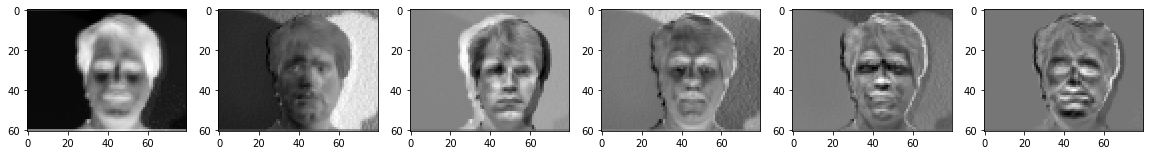

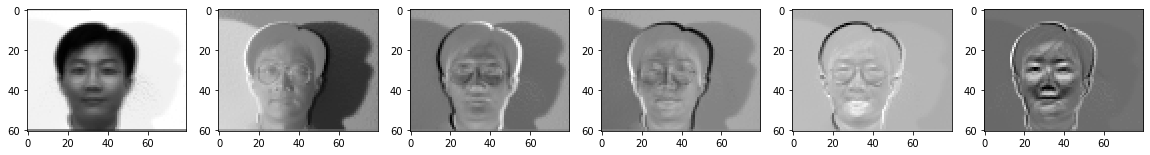

In [176]:
for subj in ['01','14']:

    image_list = []
    images = glob.glob('yalefaces/subject{}.*'.format(subj))
    for img in images:
        image = plt.imread(img)
        image_downscaled = downscale_local_mean(image, (4, 4))
        flat = image_downscaled.flatten()
        image_list.append(flat)
        m,n = image_downscaled.shape
    X = np.stack(image_list, axis = 1)
    X_centered = (X - np.mean(X, axis = 0)) / np.std(X)
    u = np.dot(X_centered.T,X_centered)
    eig_val,eig_vec=np.linalg.eig(u)
    
    
    d = {s:{} for s in subj}
    e_faces = []
    fig, ax = plt.subplots(1,6,figsize=(20, 10))
    for i in range(6):
        e_face = np.dot(X_centered,eig_vec[:,i]).reshape(m,n)
        e_faces.append(e_face)
        ax[i].imshow(e_face,cmap='gray')
    for e_face in e_faces:
        pass
    #get scores as go through

In [173]:
image = plt.imread('yalefaces/subject14-test.gif')
image_downscaled = downscale_local_mean(image, (4, 4))
flat = image_downscaled.flatten()


PCA is picking out the features that most represent a person, this is what the first jth eigenvectors represent, the features that most represent a given individual.  Projecting the test image onto the eigenvalue is finding 

In [174]:
np.dot(e_faces.flatten().reshape(1,4880), flat.reshape(4880,1))

array([[-3682.61060155]])